In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 1. Load the dataset into python environment
data_path = 'titanic_dataset.csv'
df = pd.read_csv(data_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# 2. Make ‘PassengerId’ as the index column
df.set_index('PassengerId', inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
# 3. Check the basic details of the dataset
print("Basic Details of the Dataset:")
print(df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

Basic Details of the Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

Summary Statistics:
          Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.5264

In [5]:
# 4. Fill in all the missing values present in all the columns in the dataset
# Filling missing numeric values with mean
df.fillna({col: df[col].mean() for col in df.select_dtypes(include=['float64', 'int64'])}, inplace=True)
# Filling missing categorical values with mode
df.fillna({col: df[col].mode()[0] for col in df.select_dtypes(include=['object'])}, inplace=True)

print("\nMissing Values After Imputation:\n", df.isnull().sum())


Missing Values After Imputation:
 Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


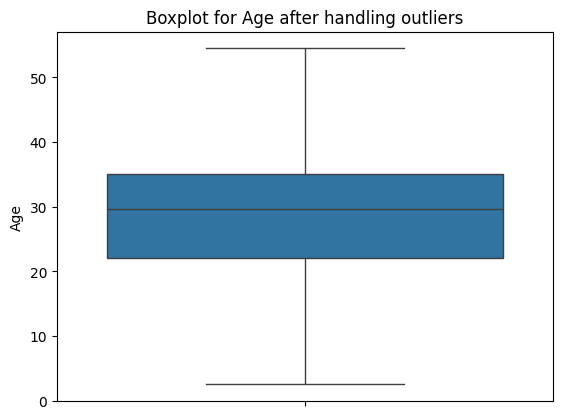

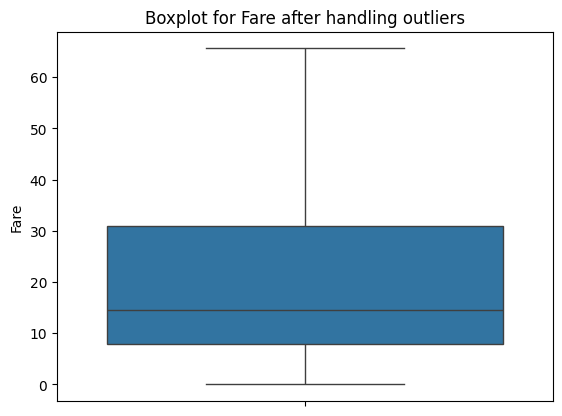

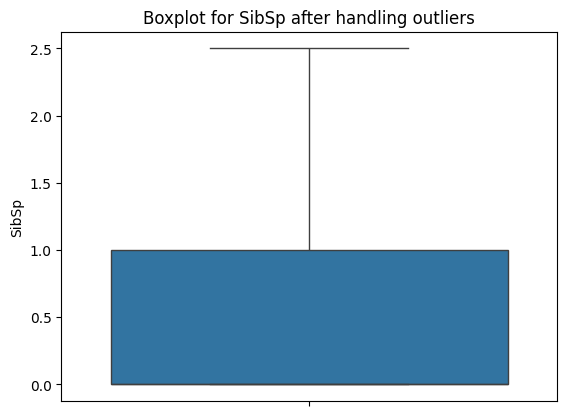

In [6]:

# 5. Check and handle outliers in at least 3 columns in the dataset
columns_to_check = ['Age', 'Fare', 'SibSp']
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # print(f"\nOutliers in column {col}:\n", outliers)

    # Handling outliers by capping
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Visualizing columns after handling outliers
for col in columns_to_check:
    sns.boxplot(df[col])
    plt.title(f"Boxplot for {col} after handling outliers")
    plt.show()

In [7]:
# 6. Do min-max scaling on the feature set (Take 'Survived' as target)
target = 'Survived'
features = df.drop(columns=[target])

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features.select_dtypes(include=['float64', 'int64']))

scaled_df = pd.DataFrame(scaled_features, columns=features.select_dtypes(include=['float64', 'int64']).columns, index=features.index)

# Adding back categorical columns
scaled_df = pd.concat([scaled_df, features.select_dtypes(include=['object'])], axis=1)
scaled_df[target] = df[target]

print("\nScaled Dataset:\n", scaled_df.head())


Scaled Dataset:
              Pclass       Age  SibSp  Parch      Fare  \
PassengerId                                             
1               1.0  0.375000    0.4    0.0  0.110460   
2               0.0  0.682692    0.4    0.0  1.000000   
3               1.0  0.451923    0.0    0.0  0.120745   
4               0.0  0.625000    0.4    0.0  0.809027   
5               1.0  0.625000    0.0    0.0  0.122649   

                                                          Name     Sex  \
PassengerId                                                              
1                                      Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
3                                       Heikkinen, Miss. Laina  female   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                     Allen, Mr. William Henry    male   

                       Ticket    Cabin Embarked  Survived  
Pas